In [295]:
import cv2
import numpy as np
import matplotlib.pyplot as pyplot
import os
import re
import math
from enum import Enum

In [296]:
class Filter(Enum):
  RECTANGLE = cv2.MORPH_RECT
  CROSS = cv2.MORPH_CROSS
  ELLIPSE = cv2.MORPH_ELLIPSE

In [297]:
ASSETS_FOLDER = "assets/"
OUTPUT_FOLDER = "output/"
SHAPE = (5, 5)

In [298]:
def display_image(image, title):
  imgplot = pyplot.imshow(image, cmap="gray")
  pyplot.axis('off')
  pyplot.title(title)
  pyplot.show()

In [299]:
def display_images(images, titles):
  fig, ax = pyplot.subplots(1, len(images))
  fig.set_figheight(20)
  fig.set_figwidth(20)
  fig.tight_layout()
  
  for n in range(len(images)):
    ax[n].set_title(titles[n], fontsize=16)
    ax[n].imshow(images[n])
    ax[n].set_axis_off()

In [300]:
def fix_image(image):
  image[image > 1] = 1
  image[image <= 0] = 0
  return image

In [301]:
def load_image(filename):
  image = cv2.imread(ASSETS_FOLDER + filename, -1)
  max_value = np.iinfo(image.dtype).max

  if image is not None:
    image = image.astype(np.float32)
    image = image / max_value
    image = fix_image(image)

    return image

In [302]:
def get_filter(shape, type):
  return cv2.getStructuringElement(type, shape)

In [303]:
def erode(image, filter):
  return cv2.erode(image, filter, iterations=1)

In [304]:
def dilate(image, filter):
  return cv2.dilate(image, filter, iterations=1)

In [305]:
def opening(image, filter):
  eroded = erode(image, filter)
  return dilate(eroded, filter)

In [306]:
def closing(image, filter):
  dilated = dilate(image, filter)
  return erode(dilated, filter)

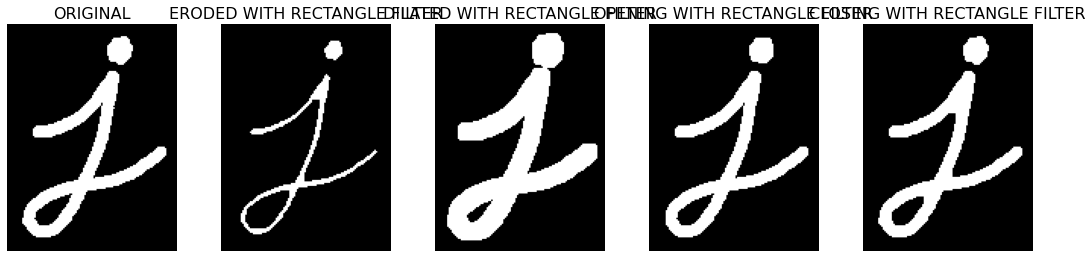

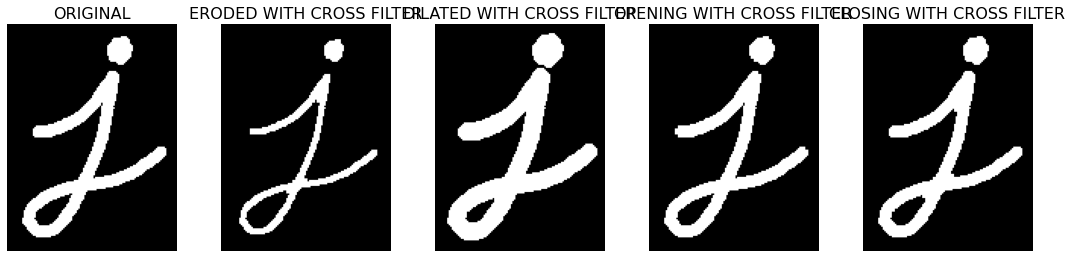

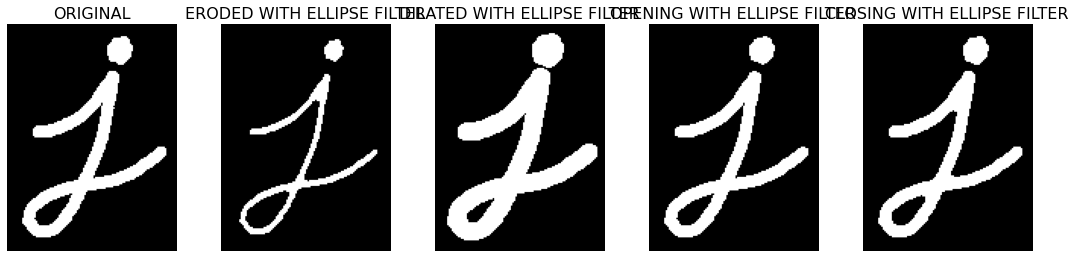

In [307]:
for filter in Filter:
  image = load_image("j.png")
  kernel = get_filter(SHAPE, filter.value)

  images = [
    image,
    erode(image, kernel),
    dilate(image, kernel),
    opening(image, kernel),
    closing(image, kernel)
  ]

  titles = [
    "ORIGINAL", 
    "ERODED WITH " + filter.name + " FILTER", 
    "DILATED WITH " + filter.name + " FILTER",
    "OPENING WITH " + filter.name + " FILTER",
    "CLOSING WITH " + filter.name + " FILTER"
  ]

  display_images(images, titles)